Objectives:
- What factors are contributing more to employee attrition?
- What type of measures should the company take in order to retain their employees?
- What business value does the model bring?
- Will the model save lots of money?
- Which business unit faces the attrition problem?

In [5]:
import pandas as pd
file_path = r"D:\Projects\IBM HR Analytics Employee Attrition and Performance\data\working_hr.csv"
df = pd.read_csv(file_path)

In [6]:
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (1470, 35)
Column Names: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField       

In [7]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

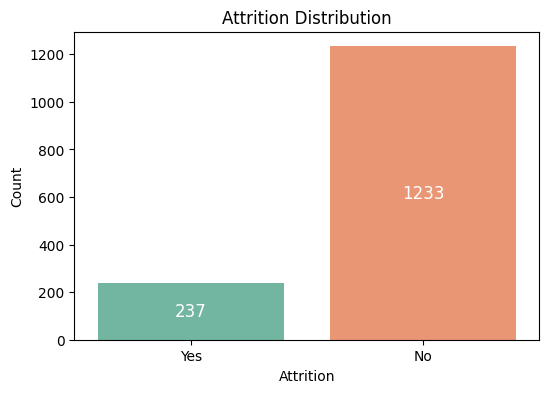

In [15]:
# Create the countplot
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Attrition', hue='Attrition', palette='Set2', legend=False)

# Annotate the bars with count labels inside
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=12, color='white')

# Add title and labels
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')

plt.savefig(r"D:\Projects\IBM HR Analytics Employee Attrition and Performance\reports\attrition_distribution.png", bbox_inches='tight')
# Show the plot
plt.show()


### Attrition Distribution Analysis 
- The dataset consists of **1,470 employees**.
- **237 employees** have left the company 
- **1,233 employees** have stayed 
- The company has a relatively low attrition rate, but further analysis is needed to identify key factors influencing employee turnover.


In [17]:
df_numeric = df.copy()

In [87]:
df_numeric.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [19]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
for col in df_numeric.select_dtypes(include=['object']).columns:  # Only categorical columns
    df_numeric[col] = label_encoder.fit_transform(df_numeric[col])

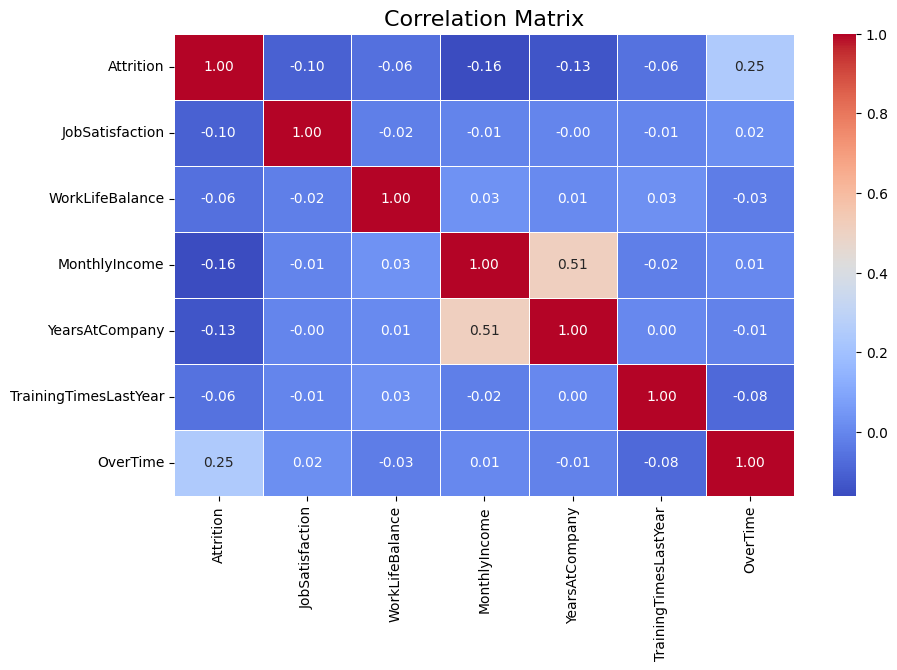

In [73]:
selected_columns = ["Attrition", "JobSatisfaction", "WorkLifeBalance", "MonthlyIncome", 
                    "YearsAtCompany", "TrainingTimesLastYear", "OverTime"]
corr_matrix = df_numeric[selected_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.savefig(r"D:\Projects\IBM HR Analytics Employee Attrition and Performance\reports\correlation_matrix.png", bbox_inches='tight')
plt.show()


- Salary, job satisfaction, and tenure have a small effect in reducing attrition, but overtime is the most critical factor influencing employee turnover. Employees working excessive hours might feel burnout, leading them to leave.

- Job satisfaction does not depend heavily on salary, tenure, or training.

- Work-life balance has almost no impact on attrition or job satisfaction, which suggests other factors (such as job role or personal circumstances) might matter more.

- Higher salaries reduce attrition but don’t necessarily increase job satisfaction.

- Experience plays a bigger role in salary increases than work-life balance or overtime.

In [26]:
for column in df_numeric.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

In [28]:
df_numeric.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [30]:
df_numeric.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [35]:
pip install hvplot

   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.0 MB 9.5 MB/s eta 0:00:01
   -------------------- ------------------- 3.7/7.0 MB 8.3 MB/s eta 0:00:01
   -------------------------------- ------- 5.8/7.0 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 8.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ---------------- ----------------------- 2.1/5.0 MB 11.1 MB/s eta 0:00:01
   --------------------------------- ------ 4.2/5.0 MB 10.3 MB/s eta 0:00:01
   ---------------------------------------- 5.0/5.0 MB 9.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.2 MB ? eta -:--:--
   -- ------------------------------------- 2.1/28.2 MB 10.1 MB/s eta 0:00:03
   ----- ---------------------------------- 4.2/28.2 MB 10.3 MB/s eta 0:00:03
   -------- ------------------------------- 6.3/28.2 MB 10.2 MB/s eta 0:00:03
   ------------ --------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import hvplot.pandas

In [86]:
df_numeric.hvplot.hist(y='DistanceFromHome', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [DistanceFromHome]   (Count)

In [40]:
df_numeric.hvplot.hist(y='Education', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [Education]   (Count)

In [41]:
df_numeric.hvplot.hist(y='RelationshipSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [RelationshipSatisfaction]   (Count)

In [42]:
df_numeric.hvplot.hist(y='EnvironmentSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [EnvironmentSatisfaction]   (Count)

In [43]:
df_numeric.hvplot.hist(y='JobInvolvement', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobInvolvement]   (Count)

In [44]:
df_numeric.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (Count)

In [45]:
df_numeric.hvplot.hist(y='JobSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobSatisfaction]   (Count)

In [46]:
df_numeric.hvplot.hist(y='NumCompaniesWorked', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [NumCompaniesWorked]   (Count)

In [47]:
df_numeric.hvplot.hist(y='PercentSalaryHike', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [PercentSalaryHike]   (Count)

In [48]:
df_numeric.hvplot.hist(y='TrainingTimesLastYear', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [TrainingTimesLastYear]   (Count)

In [49]:
df_numeric.hvplot.hist(y='StockOptionLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [StockOptionLevel]   (Count)

In [50]:
df_numeric.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [Age]   (Count)

In [51]:
df_numeric.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Attrition]
   :Histogram   [MonthlyIncome]   (Count)

In [52]:
df_numeric.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [YearsAtCompany]   (Count)

In [53]:
df_numeric.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [TotalWorkingYears]   (Count)

Employee Attrition Analysis

- Employees with low job level, salary, and experience are more likely to quit.

- Frequent business travel increases attrition risk.

- R&D employees are more likely to stay.

- HR & Technical Degree holders quit more often.

- Males have a higher attrition rate.

- Lab Technicians, Sales Reps, and HR staff are more likely to leave.

- Single employees quit more than married or divorced ones.

- Overtime increases turnover risk.

In [57]:
df_numeric.drop('Attrition', axis=1).corrwith(df_numeric.Attrition).hvplot.barh(width=800, height=600)

:Bars   [index]   (0)

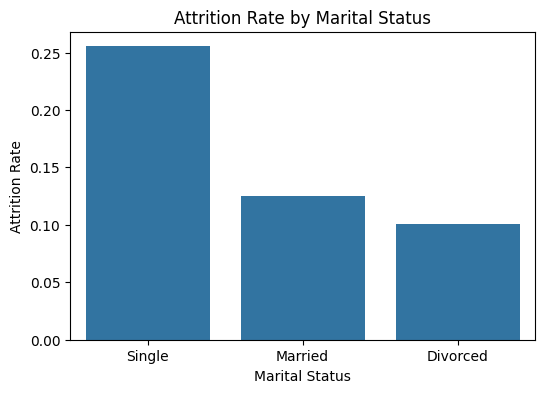

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='MaritalStatus', y='Attrition', data=df, errorbar=None)
plt.title("Attrition Rate by Marital Status")
plt.ylabel("Attrition Rate")
plt.xlabel("Marital Status")
plt.show()

- Single employees are more likely to leave the company compared to married or divorced employees